# Using mediapipe model and landmarks:

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 27 21:18:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 925.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import mediapipe as mp
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
import cv2
from PIL import Image
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers, optimizers, callbacks
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input

In [5]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense')

In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense


In [7]:
import cv2
import mediapipe as mp
import numpy as np
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize MediaPipe Hands model
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)

In [8]:

# Function to detect hand landmarks and draw them without the imagex
def visualize_hand_landmarks_without_image(image):


    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect hand landmarks
    results = hands.process(image_rgb)
    # print("Detection results:", results.multi_hand_landmarks)

    blank_image = np.zeros_like(image)


    # If landmarks are detected, draw them on the blank canvas
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        # Draw hand landmarks on the blank canvas
          mp_drawing.draw_landmarks(blank_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

      return blank_image
    else:
      return None


In [10]:

def load_asl_data():

    data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_train/asl_alphabet_train'
    classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, "O":13, "P":14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19,
               "V":20, 'W':21, 'X':22, "Y":23}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:2000]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((200, 200))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    # first_split = int(len(imgs) /6.)
    second_split = int(len(imgs) * 0.2)
    X_test, X_train = X[:second_split], X[second_split:]
    y_test, y_train = y[:second_split], y[second_split:]

    return X_train, y_train, X_test, y_test, num_classes

In [ ]:
X_train, y_train, X_test, y_test, num_classes = load_asl_data()

100%|██████████| 2000/2000 [01:07<00:00, 29.74it/s] 


In [9]:

def load_asl_data():

    data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_train/asl_alphabet_train'
    classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, "O":13, "P":14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19,
               "V":20, 'W':21, 'X':22, "Y":23}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:20]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = cv2.imread(path)
                balnk_image = visualize_hand_landmarks_without_image(image)
                if balnk_image is not None:
                  image = balnk_image.resize((200, 200))
                  imgs.append(np.array(image))
                  labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    # first_split = int(len(imgs) /6.)
    second_split = int(len(imgs) * 0.2)
    X_test, X_train = X[:second_split], X[second_split:]
    y_test, y_train = y[:second_split], y[second_split:]

    return X_train, y_train, X_test, y_test, num_classes

In [12]:
print(X_train.shape, X_test.shape)

(19200, 200, 200, 3) (4800, 200, 200, 3)


In [13]:
X_train[0].shape

(200, 200, 3)

In [14]:
y_train.shape

(19200, 24)

In [15]:
len(X_train)

19200

In [18]:
def prepare_data_train():
  batch_size = 1  # Define the batch size

  img_data= []
  y_train_filtered= []

# Process the dataset in batches
  for i in range(0, len(X_train), batch_size):
      batch_X = X_train[i:i+batch_size]  # Extract a batch of images
      batch_y = y_train[i:i+batch_size]  # Extract corresponding labels

      # Process each image in the batch
      for j in range(len(batch_X)):
          blank_image = visualize_hand_landmarks_without_image(batch_X[j])
          if blank_image is not None:
              y_train_filtered.append(batch_y[j])
              img_data.append(blank_image)


  y_train_filtered_np = np.array(y_train_filtered)
  X_train_filtered = np.stack(img_data)

  return X_train_filtered, y_train_filtered_np


In [19]:
X_train_filtered, y_train_filtered_np= prepare_data_train()

In [20]:
X_train_filtered.shape

(5035, 200, 200, 3)

In [24]:
image_data= []
y_train_filtered = []
for i in range(len(X_train)):
  balnk_image = visualize_hand_landmarks_without_image(X_train[i])
  if balnk_image is not None:
    image_data.append(balnk_image)
    y_train_filtered.append(y_train[i])

# image_data, y_train_filtered

In [25]:
y_train_filtered_np = np.array(y_train_filtered)

In [21]:
y_train_filtered_np.shape

(5035, 24)

In [27]:
X_train_filtered = np.stack(image_data)

In [28]:
X_train_filtered.shape

(62, 200, 200, 3)

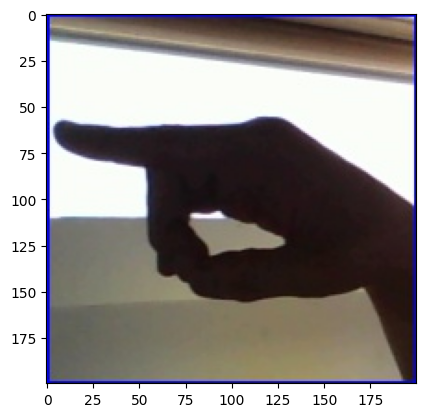

In [36]:
plt.imshow(X_train[9])

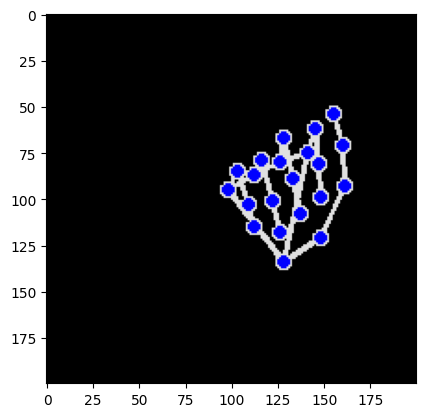

In [22]:
plt.imshow(X_train_filtered[44])

In [23]:
def dummy_model():
  # input_shape= X_train[0].shape
  model = Sequential()

  model.add(layers.Rescaling(1./255, input_shape = (200, 200, 3)))
  model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


  model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


  model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

  model.add(layers.Flatten())

  # Here we flatten our data

  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dropout(0.2))


# prediction layer
  model.add(layers.Dense(24, activation="softmax"))

# compiling model
  adam = optimizers.Adam(learning_rate = 0.001)
  model.compile(loss='categorical_crossentropy',
                optimizer= adam,
                metrics=['accuracy'])


  return model

In [24]:
dummy_model= dummy_model()
dummy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       7

In [25]:
MODEL = "dummy_model_landmark"

modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)


In [26]:
%%time
history = dummy_model.fit(X_train_filtered, y_train_filtered_np,
        epochs=30,
        validation_split= 0.2,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 2.5888 - accuracy: 0.2574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126/126 [==============================] - 39s 247ms/step - loss: 2.5888 - accuracy: 0.2574 - val_loss: 1.7540 - val_accuracy: 0.5452 - lr: 0.0010
Epoch 2/30
126/126 [==============================] - 6s 50ms/step - loss: 1.4057 - accuracy: 0.5958 - val_loss: 1.0521 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 3/30
126/126 [==============================] - 6s 47ms/step - loss: 0.8049 - accuracy: 0.7574 - val_loss: 0.8663 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 4/30
126/126 [==============================] - 6s 44ms/step - loss: 0.5302 - accuracy: 0.8349 - val_loss: 0.8963 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 5/30
126/126 [==============================] - 6s 45ms/step - loss: 0.3486 - accuracy: 0.8918 - val_loss: 0.9434 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 6/30
125/126 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.9072
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
126/126 [==============================] - 6s 44ms/step 

In [27]:
dummy_model.save('/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/models/dummy_model_landmark.h5')

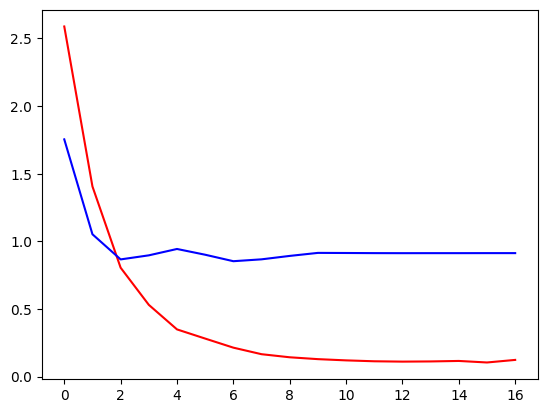

In [29]:
plt.plot(history.history["loss"], 'r')
plt.plot(history.history["val_loss"], 'b')


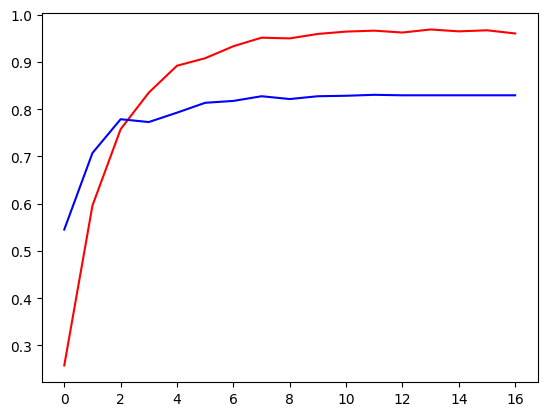

In [30]:
plt.plot(history.history["accuracy"], 'r')
plt.plot(history.history["val_accuracy"], 'b')

In [10]:
model_dummy_landmarks = load_model("models/dummy_model_landmark.h5")

In [11]:
def prepare_data_test():
  batch_size = 1  # Define the batch size

  img_data= []
  y_train_filtered= []

# Process the dataset in batches
  for i in range(0, len(X_test), batch_size):
      batch_X = X_test[i:i+batch_size]  # Extract a batch of images
      batch_y = y_test[i:i+batch_size]  # Extract corresponding labels

      # Process each image in the batch
      for j in range(len(batch_X)):
          blank_image = visualize_hand_landmarks_without_image(batch_X[j])
          if blank_image is not None:
              y_train_filtered.append(batch_y[j])
              img_data.append(blank_image)


  y_test_filtered_np = np.array(y_train_filtered)
  X_test_filtered = np.stack(img_data)

  return X_test_filtered, y_test_filtered_np


In [35]:
X_test_filtered, y_test_filtered_np= prepare_data_test()

In [36]:
# Evaluation:
res = dummy_model.evaluate(X_test_filtered, y_test_filtered_np)
res

41/41 [==============================] - 1s 28ms/step - loss: 0.8660 - accuracy: 0.8224


[0.8659614324569702, 0.8224442601203918]

In [47]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test'
files = os.listdir(test_data_path)
path = os.path.join(test_data_path, files[4])
path

'/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test/Y_test.jpg'

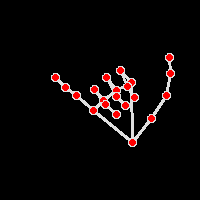

In [48]:
image = cv2.imread(path)
balnk_image = visualize_hand_landmarks_without_image(image)
# print(balnk_image)
cv2_imshow(balnk_image)
# image = balnk_image.resize((200, 200))
sample_test_np = np.stack(balnk_image)


In [38]:
sample_test_np.shape

(200, 200, 3)

In [49]:
img = sample_test_np.reshape((-1, 200, 200, 3))
res = model_dummy_landmarks.predict(img)
predicted_indc= np.argmax(res)
classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, "O":13, "P":14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19,
               "V":20, 'W':21, 'X':22, "Y":23, 'del':24, 'nothing':25, 'space':26}
predicted_letter = [letter for letter, indic in classes.items() if indic == predicted_indc]
print(predicted_letter)

1/1 [==============================] - 0s 18ms/step
['F']
